Graph visualization

This notebook only visualizes the agent workflow graph (no API key required).


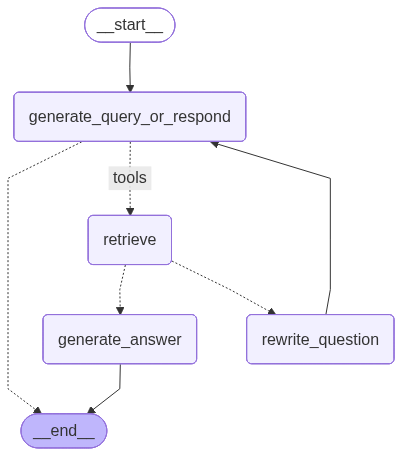

In [1]:
import sys

# Allow importing local packages when executed from notebooks/
sys.path.append("..")

from typing import Literal
from IPython.display import Image, display
from langchain.tools import tool
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition

# --- Minimal placeholders to build the graph structure for visualization ---
@tool
def retrieve_blog_posts(query: str) -> str:
    """Placeholder retriever tool for graph visualization only."""
    return "(retrieval output omitted in visualization-only notebook)"

def generate_query_or_respond(state: MessagesState):
    # In the real system, the LLM decides whether to call tools.
    # For visualization, we return the state unchanged.
    return {}

def rewrite_question(state: MessagesState):
    return {}

def generate_answer(state: MessagesState):
    return {}

def grade_documents(state: MessagesState) -> Literal["generate_answer", "rewrite_question"]:
    # In the real system, this grades retrieved context relevance.
    return "generate_answer"

tools = [retrieve_blog_posts]
workflow = StateGraph(MessagesState)

workflow.add_node("generate_query_or_respond", generate_query_or_respond)
workflow.add_node("retrieve", ToolNode(tools))
workflow.add_node("rewrite_question", rewrite_question)
workflow.add_node("generate_answer", generate_answer)

workflow.add_edge(START, "generate_query_or_respond")
workflow.add_conditional_edges(
    "generate_query_or_respond",
    tools_condition,
    {"tools": "retrieve", END: END},
)
workflow.add_conditional_edges("retrieve", grade_documents)
workflow.add_edge("rewrite_question", "generate_query_or_respond")
workflow.add_edge("generate_answer", END)

graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


d:\Git\work\money-forward\本選考\hybird-rag-agent\assets\RAG_eval.png


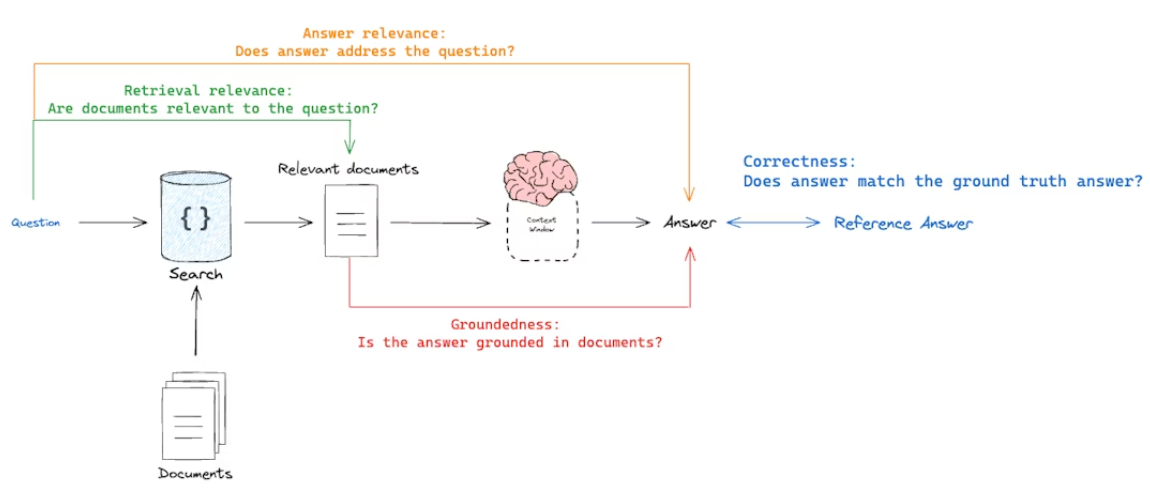

In [5]:
from IPython.display import Image, display
from pathlib import Path
CURRENT_DIR = Path.cwd()
ROOT_DIR = CURRENT_DIR.parent
image_path = ROOT_DIR/'assets'/"RAG_eval.png"
print(image_path)
display(Image(filename=str(image_path)))